**Load the Dataset**

In [ ]:
import pandas as pd
a = pd.read_csv('plmpva.csv')

a

,call_timestamp,recording_duration,callref,audio_duration,voice_indexstart,voice_indexend,voice_code,voice_usable_duration,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,user_id_hashed,pvi_created_at,current_age,sex,years_since_first_symptom,pdrs_date,pdrs_reported_at,days_from_pvi_to_pdrs,pdrs_score,memory,hallucinations,mood,motivation,speech,saliva,swallowing,handwriting,cutting_food,dressing,hygiene,turning_in_bed,falling,freezing,walking,tremors,numbness,hoehn_yahr,on_treatment_id,calls_per_user
0,2014/01/25 01:59:25 UTC +0000,22,5256580,20.945,241.0,126800.0,ok,15.82,110.989,1846.842,72.217,0.149,0.107,-12.185,16.170,-20.721,-2.647,-13.442,-9.649,3.546,-10.633,-0.887,-1.748,-1.147,0.541,-9.819,25.795,12.533,31.265,34.426,29.092,36.400,33.732,38.544,40.035,41.281,43.961,34.335,41.372,0.735,1.025,0.402,-1.714,0.000,-1.042,-2.371,7ae4b165c4168d202d3ec5f320f1fac162408e71,59:52.3,53,M,3,1/24/2014,20:43.2,1,13,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,2,0,2,True,5
1,2014/01/25 05:49:32 UTC +0000,24,4571342,22.018,401.0,61760.0,ok,7.67,212.936,113.382,49.641,0.317,0.215,-8.445,21.139,-12.832,2.256,-11.621,-2.838,5.861,-13.326,2.488,-0.391,-5.483,-1.928,-9.037,24.096,14.167,27.605,35.249,38.031,33.682,44.192,38.697,40.401,48.316,43.601,42.213,47.656,0.517,1.255,0.206,-0.036,0.000,-0.808,-2.048,04ee742a13261be00c842cf17c3b12295e11b516,50:24.4,71,F,13,1/25/2014,45:05.7,0,22,2,2,0,1,0,0,0,1,1,1,1,1,2,0,1,1,1,3,True,1
2,2014/01/25 08:45:10 UTC +0000,13,8346562,11.703,1.0,54160.0,ok,6.77,164.909,114.175,40.285,0.315,0.236,-9.982,20.735,-11.899,5.533,-8.883,-4.941,11.474,-4.827,-0.548,-2.422,-1.649,2.040,-4.123,27.454,13.572,27.392,27.693,38.210,30.856,41.877,37.238,47.269,41.500,40.262,40.114,39.561,0.701,1.136,0.210,-0.692,0.000,-1.715,-2.236,f694b4ea0203f046ec5378e272747051d78a9f6f,46:08.1,61,F,9,1/25/2014,43:32.8,0,20,1,1,0,1,3,0,0,3,1,0,0,0,1,0,1,2,0,1,True,3
3,2014/01/25 12:05:37 UTC +0000,21,7287416,15.278,1.0,113200.0,ok,14.15,114.804,130.739,48.474,0.771,0.562,0.700,19.058,-23.514,7.705,-13.035,2.313,9.291,-18.619,6.129,-4.770,0.726,2.039,-19.615,44.461,21.021,28.376,31.829,37.603,25.761,32.840,35.821,37.893,36.693,33.331,43.561,51.863,0.655,0.737,0.036,-0.880,0.000,-0.110,-1.423,5521fb3c47164e0b081d6255333549ddb4e85653,06:48.1,61,M,16,1/25/2014,01:43.7,0,44,2,1,1,1,2,3,1,3,2,2,1,2,1,2,2,3,1,4,True,1
4,2014/01/26 02:14:59 UTC +0000,24,4085211,21.706,1.0,139440.0,ok,17.43,191.410,25.721,21.770,0.177,0.159,-4.317,19.514,-21.286,1.023,-14.049,-2.954,10.176,-9.700,2.499,-4.955,-0.974,-1.213,-12.727,14.212,10.820,14.502,25.912,25.091,25.026,19.864,23.409,34.927,32.018,25.157,23.072,33.266,0.427,0.957,0.224,-1.284,0.000,-1.103,-1.983,de32f24c6acd96a836288c20dabb46a2659444a1,15:40.7,55,F,2,1/25/2014,13:04.8,1,27,1,1,2,3,1,3,1,1,1,0,0,1,1,0,1,1,1,3,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2014/01/21 19:26:06 UTC +0000,18,194489,12.342,10481.0,98560.0,ok,11.01,212.505,46.054,36.686,0.211,0.147,-5.422,21.951,-15.182,4.885,-8.916,-1.274,9.045,-12.884,-1.583,-5.295,-6.797,-1.317,-7.002,12.572,6.886,16.784,22.072,27.050,29.884,29.286,24.770,30.044,29.038,25.434,26.340,29.368,0.508,1.207,0.131,0.000,-0.003,-0.617,-1.720,a83d931e03eb1f52e3abe5aa72129c0ca0b99ca4,26:50.7,61,F,5,1/21/2014,24:31.5,0,10,0,0,1,0,0,0,0,2,1,0,0,0,0,0,1,2,0,1,True,2
775,2014/01/19 22:45:15 UTC +0000,22,5841487,15.377,161.0,118800.0,ok,14.83,110.925,21.483,16.507,0.299,0.235,-8.755,2

In [ ]:
#remove unncessary features
a = a.drop(axis=1,columns=['call_timestamp', 'callref', 'voice_code', 'user_id_hashed', 'pvi_created_at','pdrs_date','pdrs_reported_at'])

In [ ]:
a.head()

,recording_duration,audio_duration,voice_indexstart,voice_indexend,voice_usable_duration,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,current_age,sex,years_since_first_symptom,days_from_pvi_to_pdrs,pdrs_score,memory,hallucinations,mood,motivation,speech,saliva,swallowing,handwriting,cutting_food,dressing,hygiene,turning_in_bed,falling,freezing,walking,tremors,numbness,hoehn_yahr,on_treatment_id,calls_per_user
0,22,20.945,241.0,126800.0,15.82,110.989,1846.842,72.217,0.149,0.107,-12.185,16.170,-20.721,-2.647,-13.442,-9.649,3.546,-10.633,-0.887,-1.748,-1.147,0.541,-9.819,25.795,12.533,31.265,34.426,29.092,36.400,33.732,38.544,40.035,41.281,43.961,34.335,41.372,0.735,1.025,0.402,-1.714,0.0,-1.042,-2.371,53,M,3,1,13,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,2,0,2,True,5
1,24,22.018,401.0,61760.0,7.67,212.936,113.382,49.641,0.317,0.215,-8.445,21.139,-12.832,2.256,-11.621,-2.838,5.861,-13.326,2.488,-0.391,-5.483,-1.928,-9.037,24.096,14.167,27.605,35.249,38.031,33.682,44.192,38.697,40.401,48.316,43.601,42.213,47.656,0.517,1.255,0.206,-0.036,0.0,-0.808,-2.048,71,F,13,0,22,2,2,0,1,0,0,0,1,1,1,1,1,2,0,1,1,1,3,True,1
2,13,11.703,1.0,54160.0,6.77,164.909,114.175,40.285,0.315,0.236,-9.982,20.735,-11.899,5.533,-8.883,-4.941,11.474,-4.827,-0.548,-2.422,-1.649,2.040,-4.123,27.454,13.572,27.392,27.693,38.210,30.856,41.877,37.238,47.269,41.500,40.262,40.114,39.561,0.701,1.136,0.210,-0.692,0.0,-1.715,-2.236,61,F,9,0,20,1,1,0,1,3,0,0,3,1,0,0,0,1,0,1,2,0,1,True,3
3,21,15.278,1.0,113200.0,14.15,114.804,130.739,48.474,0.771,0.562,0.700,19.058,-23.514,7.705,-13.035,2.313,9.291,-18.619,6.129,-4.770,0.726,2.039,-19.615,44.461,21.021,28.376,31.829,37.603,25.761,32.840,35.821,37.893,36.693,33.331,43.561,51.863,0.655,0.737,0.036,-0.880,0.0,-0.110,-1.423,61,M,16,0,44,2,1,1,1,2,3,1,3,2,2,1,2,1,2,2,3,1,4,True,1
4,24,21.706,1.0,139440.0,17.43,191.410,25.721,21.770,0.177,0.159,-4.317,19.514,-21.286,1.023,-14.049,-2.954,10.176,-9.700,2.499,-4.955,-0.974,-1.213,-12.727,14.212,10.820,14.502,25.912,25.091,25.026,19.864,23.409,34.927,32.018,25.157,23.072,33.266,0.427,0.957,0.224,-1.284,0.0,-1.103,-1.983,55,F,2,1,27,1,1,2,3,1,3,1,1,1,0,0,1,1,0,1,1,1,3,True,3


In [ ]:
a.isna().sum()

recording_duration        0
audio_duration            0
voice_indexstart         32
voice_indexend           32
voice_usable_duration     0
                         ..
tremors                   0
numbness                  0
hoehn_yahr                0
on_treatment_id           0
calls_per_user            0
Length: 68, dtype: int64

Drop Null values

In [ ]:
a = a.dropna()

In [ ]:
df = pd.get_dummies(a, columns=['sex', 'on_treatment_id'])
df.head()

,recording_duration,audio_duration,voice_indexstart,voice_indexend,voice_usable_duration,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,current_age,years_since_first_symptom,days_from_pvi_to_pdrs,pdrs_score,memory,hallucinations,mood,motivation,speech,saliva,swallowing,handwriting,cutting_food,dressing,hygiene,turning_in_bed,falling,freezing,walking,tremors,numbness,hoehn_yahr,calls_per_user,sex_F,sex_M,on_treatment_id_False,on_treatment_id_True
0,22,20.945,241.0,126800.0,15.82,110.989,1846.842,72.217,0.149,0.107,-12.185,16.170,-20.721,-2.647,-13.442,-9.649,3.546,-10.633,-0.887,-1.748,-1.147,0.541,-9.819,25.795,12.533,31.265,34.426,29.092,36.400,33.732,38.544,40.035,41.281,43.961,34.335,41.372,0.735,1.025,0.402,-1.714,0.0,-1.042,-2.371,53,3,1,13,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,2,0,2,5,0,1,0,1
1,24,22.018,401.0,61760.0,7.67,212.936,113.382,49.641,0.317,0.215,-8.445,21.139,-12.832,2.256,-11.621,-2.838,5.861,-13.326,2.488,-0.391,-5.483,-1.928,-9.037,24.096,14.167,27.605,35.249,38.031,33.682,44.192,38.697,40.401,48.316,43.601,42.213,47.656,0.517,1.255,0.206,-0.036,0.0,-0.808,-2.048,71,13,0,22,2,2,0,1,0,0,0,1,1,1,1,1,2,0,1,1,1,3,1,1,0,0,1
2,13,11.703,1.0,54160.0,6.77,164.909,114.175,40.285,0.315,0.236,-9.982,20.735,-11.899,5.533,-8.883,-4.941,11.474,-4.827,-0.548,-2.422,-1.649,2.040,-4.123,27.454,13.572,27.392,27.693,38.210,30.856,41.877,37.238,47.269,41.500,40.262,40.114,39.561,0.701,1.136,0.210,-0.692,0.0,-1.715,-2.236,61,9,0,20,1,1,0,1,3,0,0,3,1,0,0,0,1,0,1,2,0,1,3,1,0,0,1
3,21,15.278,1.0,113200.0,14.15,114.804,130.739,48.474,0.771,0.562,0.700,19.058,-23.514,7.705,-13.035,2.313,9.291,-18.619,6.129,-4.770,0.726,2.039,-19.615,44.461,21.021,28.376,31.829,37.603,25.761,32.840,35.821,37.893,36.693,33.331,43.561,51.863,0.655,0.737,0.036,-0.880,0.0,-0.110,-1.423,61,16,0,44,2,1,1,1,2,3,1,3,2,2,1,2,1,2,2,3,1,4,1,0,1,0,1
4,24,21.706,1.0,139440.0,17.43,191.410,25.721,21.770,0.177,0.159,-4.317,19.514,-21.286,1.023,-14.049,-2.954,10.176,-9.700,2.499,-4.955,-0.974,-1.213,-12.727,14.212,10.820,14.502,25.912,25.091,25.026,19.864,23.409,34.927,32.018,25.157,23.072,33.266,0.427,0.957,0.224,-1.284,0.0,-1.103,-1.983,55,2,1,27,1,1,2,3,1,3,1,1,1,0,0,1,1,0,1,1,1,3,3,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 778
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   recording_duration         740 non-null    int64  
 1   audio_duration             740 non-null    float64
 2   voice_indexstart           740 non-null    float64
 3   voice_indexend             740 non-null    float64
 4   voice_usable_duration      740 non-null    float64
 5   feature01                  740 non-null    float64
 6   feature02                  740 non-null    float64
 7   feature03                  740 non-null    float64
 8   feature04                  740 non-null    float64
 9   feature05                  740 non-null    float64
 10  feature06                  740 non-null    float64
 11  feature07                  740 non-null    float64
 12  feature08                  740 non-null    float64
 13  feature09                  740 non-null    float64

Adding new column with 4 classes

In [ ]:
df['new_pdrs'] = ''
df.loc[(df['pdrs_score']>=0) & (df['pdrs_score'] <=9), 'new_pdrs'] = df.loc[(df['pdrs_score']>=0) & (df['pdrs_score'] <=9), 'new_pdrs'].replace('', 'healthy')
df.loc[(df['pdrs_score']>=10) & (df['pdrs_score'] <=22), 'new_pdrs'] = df.loc[(df['pdrs_score']>=10) & (df['pdrs_score'] <=22), 'new_pdrs'].replace('', 'early')
df.loc[(df['pdrs_score']>=23) & (df['pdrs_score'] <=38), 'new_pdrs'] = df.loc[(df['pdrs_score']>=23) & (df['pdrs_score'] <=38), 'new_pdrs'].replace('', 'intermediate')
df.loc[(df['pdrs_score']>=39) & (df['pdrs_score'] <=68), 'new_pdrs'] = df.loc[(df['pdrs_score']>=39) & (df['pdrs_score'] <=68), 'new_pdrs'].replace('', 'advanced')

In [ ]:
df.head()

,recording_duration,audio_duration,voice_indexstart,voice_indexend,voice_usable_duration,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,current_age,years_since_first_symptom,days_from_pvi_to_pdrs,pdrs_score,memory,hallucinations,mood,motivation,speech,saliva,swallowing,handwriting,cutting_food,dressing,hygiene,turning_in_bed,falling,freezing,walking,tremors,numbness,hoehn_yahr,calls_per_user,sex_F,sex_M,on_treatment_id_False,on_treatment_id_True,new_pdrs
0,22,20.945,241.0,126800.0,15.82,110.989,1846.842,72.217,0.149,0.107,-12.185,16.170,-20.721,-2.647,-13.442,-9.649,3.546,-10.633,-0.887,-1.748,-1.147,0.541,-9.819,25.795,12.533,31.265,34.426,29.092,36.400,33.732,38.544,40.035,41.281,43.961,34.335,41.372,0.735,1.025,0.402,-1.714,0.0,-1.042,-2.371,53,3,1,13,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,2,0,2,5,0,1,0,1,early
1,24,22.018,401.0,61760.0,7.67,212.936,113.382,49.641,0.317,0.215,-8.445,21.139,-12.832,2.256,-11.621,-2.838,5.861,-13.326,2.488,-0.391,-5.483,-1.928,-9.037,24.096,14.167,27.605,35.249,38.031,33.682,44.192,38.697,40.401,48.316,43.601,42.213,47.656,0.517,1.255,0.206,-0.036,0.0,-0.808,-2.048,71,13,0,22,2,2,0,1,0,0,0,1,1,1,1,1,2,0,1,1,1,3,1,1,0,0,1,early
2,13,11.703,1.0,54160.0,6.77,164.909,114.175,40.285,0.315,0.236,-9.982,20.735,-11.899,5.533,-8.883,-4.941,11.474,-4.827,-0.548,-2.422,-1.649,2.040,-4.123,27.454,13.572,27.392,27.693,38.210,30.856,41.877,37.238,47.269,41.500,40.262,40.114,39.561,0.701,1.136,0.210,-0.692,0.0,-1.715,-2.236,61,9,0,20,1,1,0,1,3,0,0,3,1,0,0,0,1,0,1,2,0,1,3,1,0,0,1,early
3,21,15.278,1.0,113200.0,14.15,114.804,130.739,48.474,0.771,0.562,0.700,19.058,-23.514,7.705,-13.035,2.313,9.291,-18.619,6.129,-4.770,0.726,2.039,-19.615,44.461,21.021,28.376,31.829,37.603,25.761,32.840,35.821,37.893,36.693,33.331,43.561,51.863,0.655,0.737,0.036,-0.880,0.0,-0.110,-1.423,61,16,0,44,2,1,1,1,2,3,1,3,2,2,1,2,1,2,2,3,1,4,1,0,1,0,1,advanced
4,24,21.706,1.0,139440.0,17.43,191.410,25.721,21.770,0.177,0.159,-4.317,19.514,-21.286,1.023,-14.049,-2.954,10.176,-9.700,2.499,-4.955,-0.974,-1.213,-12.727,14.212,10.820,14.502,25.912,25.091,25.026,19.864,23.409,34.927,32.018,25.157,23.072,33.266,0.427,0.957,0.224,-1.284,0.0,-1.103,-1.983,55,2,1,27,1,1,2,3,1,3,1,1,1,0,0,1,1,0,1,1,1,3,3,1,0,0,1,intermediate


In [ ]:
df.describe()

,recording_duration,audio_duration,voice_indexstart,voice_indexend,voice_usable_duration,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,current_age,years_since_first_symptom,days_from_pvi_to_pdrs,pdrs_score,memory,hallucinations,mood,motivation,speech,saliva,swallowing,handwriting,cutting_food,dressing,hygiene,turning_in_bed,falling,freezing,walking,tremors,numbness,hoehn_yahr,calls_per_user,sex_F,sex_M,on_treatment_id_False,on_treatment_id_True
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.00000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,20.236486,16.784196,3374.081081,97941.189189,11.821014,177.734701,298.685908,75.171519,0.276476,0.206988,-8.153877,19.818754,-16.471677,1.404746,-12.790069,-4.116303,7.075647,-11.573532,0.865815,-3.928874,-3.324727,0.762481,-9.272201,22.590174,12.097251,24.037880,27.926334,30.582111,31.311336,31.233541,33.420407,37.880230,37.325911,35.922018,34.254762,37.298895,0.548457,1.103741,0.128161,-0.755797,-0.022486,-1.132704,-2.071977,63.074324,8.098649,0.352703,20.778378,0.648649,0.440541,0.368919,0.937838,1.302703,0.82973,0.574324,1.748649,0.729730,0.789189,0.695946,0.905405,0.712162,0.564865,1.255405,1.143243,0.802703,2.075676,1.647297,0.509459,0.490541,0.152703,0.847297
std,6.514646,6.927800,12454.076408,55024.961920,6.851160,54.706742,724.089156,746.299133,0.144849,0.114841,3.628040,1.830382,4.557509,3.889285,3.638193,3.768740,3.371702,3.843969,3.133181,3.201055,3.595339,3.281050,3.358808,12.139847,5.288677,9.661885,9.524999,9.715915,9.227299,9.408347,9.627921,10.520921,9.617215,9.766199,9.764603,10.296336,0.096275,0.186672,0.134235,0.449353,0.097244,0.552567,0.410884,8.669305,7.650855,2.625199,11.062356,0.676944,0.672667,0.734133,0.979589,1.014239,0.82300,0.738385,1.175557,0.684198,0.714355,0.582315,0.781535,0.771350,0.911427,0.730848,0.853882,0.880702,1.008598,1.255540,0.500249,0.500249,0.359944,0.359944
min,5.000000,2.099000,1.000000,16240.000000,2.010000,90.281000,11.746000,7.582000,0.063000,0.042000,-20.382000,11.545000,-29.570000,-9.799000,-23.112000,-16.434000,-2.199000,-26.614000,-8.726000,-14.917000,-14.818000,-9.677000,-20.781000,6.257000,4.614000,7.694000,11.186000,13.291000,14.828000,11.406000,11.632000,17.199000,17.306000,15.731000,9.246000,17.275000,0.164000,0.461000,0.000000,-2.067000,-0.835000,-2.348000,-3.229000,32.000000,0.000000,-31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,11.523000,1.000000,52240.000000,6.190000,128.862500,34.857750,20.244750,0.180000,0.134750,-10.669250,18.726000,-19.668500,-1.312250,-15.287250,-6.357750,4.647000,-14.391250,-1.233500,-6.105500,-5.596000,-1.584250,-11.488750,15.538750,9.019000,17.990750,22.150000,24.627000,24.975750,24.929000,26.503500,30.834500,30.840250,29.334750,27.475500,30.503750,0.488000,0.975750,0.013000,-1.102000,0.000000,-1.577500,-2.367250,58.

Count number of people in each class

In [ ]:
df['new_pdrs'].value_counts()

early           332
intermediate    250
healthy         109
advanced         49
Name: new_pdrs, dtype: int64

Determining dependent and independent variables of the dataset

In [ ]:
X = df.drop(['pdrs_score', 'new_pdrs'], axis=1).values # select the independent variables
Y = df['new_pdrs'].values # select the dependent variable and target column

Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

**Eigendecomposition - Eigenvalues, Eigenvectors and Eigenspace**

In [ ]:
import numpy as np

X_mean = np.mean(X, axis=0)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00135318e+00  9.51751872e-01  1.33281899e-01 ...  1.13157427e-01
  -5.87808873e-02  5.87808873e-02]
 [ 9.51751872e-01  1.00135318e+00  1.55721799e-01 ...  1.18897720e-01
  -6.20450231e-02  6.20450231e-02]
 [ 1.33281899e-01  1.55721799e-01  1.00135318e+00 ...  8.11590058e-04
  -1.63170758e-03  1.63170758e-03]
 ...
 [ 1.13157427e-01  1.18897720e-01  8.11590058e-04 ...  1.00135318e+00
   2.68570744e-02 -2.68570744e-02]
 [-5.87808873e-02 -6.20450231e-02 -1.63170758e-03 ...  2.68570744e-02
   1.00135318e+00 -1.00135318e+00]
 [ 5.87808873e-02  6.20450231e-02  1.63170758e-03 ... -2.68570744e-02
  -1.00135318e+00  1.00135318e+00]]


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eigenvectors[:5])
print('\nEigenvalues \n%s' %eigenvalues[:5])

Eigenvectors 
[[ 6.96083676e-02  1.22633138e-01 -4.24200430e-03  3.03400688e-01
   1.90038444e-01 -2.53688575e-01  2.05254466e-01  3.98053844e-03
  -2.91236316e-02  1.15767572e-02 -4.91397139e-02  1.71298240e-02
   4.96812721e-03  1.79050361e-02  1.70059305e-02 -2.84368288e-02
   7.71200648e-03  2.50051837e-02  1.71643788e-02  3.60780434e-02
  -2.62227283e-02 -3.15593955e-02 -3.37581610e-02  1.83998486e-02
  -3.98492628e-02 -4.93700701e-03  2.83135825e-02  1.07468547e-02
  -3.62797588e-02 -4.39730707e-02  4.74138652e-02  8.64186280e-02
   4.55621703e-02  1.25966675e-01 -8.21317614e-03  7.12161786e-02
   3.88882671e-02 -8.56316314e-02  2.01588105e-01  5.12825513e-02
   3.33568428e-03  9.17725370e-02  3.06912777e-01 -1.42707879e-01
  -1.01980857e-01 -2.52347993e-02 -1.05982656e-02  3.56265441e-02
   2.53705234e-02 -1.99380429e-02 -1.00921027e-02  1.25393037e-02
  -4.55311683e-02 -2.30888538e-02  6.11015425e-01 -3.38035082e-01
  -4.42702844e-02 -3.54444392e-02  9.69948383e-02 -3.34830076e

In [ ]:
len(eigenvalues)

69

**Primary Component Selection**

In [ ]:
total_of_eigenvalues = sum(eigenvalues)
varariance = [(i / total_of_eigenvalues)*100 for i in sorted(eigenvalues, reverse=True)]

varariance[:50]

[18.03511449795365,
 8.64377588127465,
 8.009903352159649,
 5.951931479263408,
 3.933415374879262,
 3.627671142029744,
 3.12810354279175,
 3.0633048734184003,
 2.568863738871026,
 2.4950772868472875,
 2.249417183542564,
 1.945095816154143,
 1.8701006244122669,
 1.8209669745965193,
 1.7901049442669321,
 1.6294179129725632,
 1.578717613721532,
 1.4995852470384659,
 1.364645404876676,
 1.341866523503701,
 1.3143107687564446,
 1.2188961211538367,
 1.1908382795357462,
 1.1567031058747932,
 1.1280409384831156,
 1.1011630599800661,
 1.0860627956412976,
 0.9743733625771288,
 0.9498443851680037,
 0.9046576989311121,
 0.8966674334254848,
 0.8300708681688529,
 0.7750617527705569,
 0.7402925040476623,
 0.7377190809668587,
 0.6770559124004387,
 0.641203607524729,
 0.6236189431241818,
 0.5976995163847075,
 0.5714191763828004,
 0.5587391936638224,
 0.5236345245382353,
 0.4930282175709946,
 0.4572297930106493,
 0.41167016644117405,
 0.34313978504773857,
 0.28370864492287273,
 0.26662399525701913,
 0.2

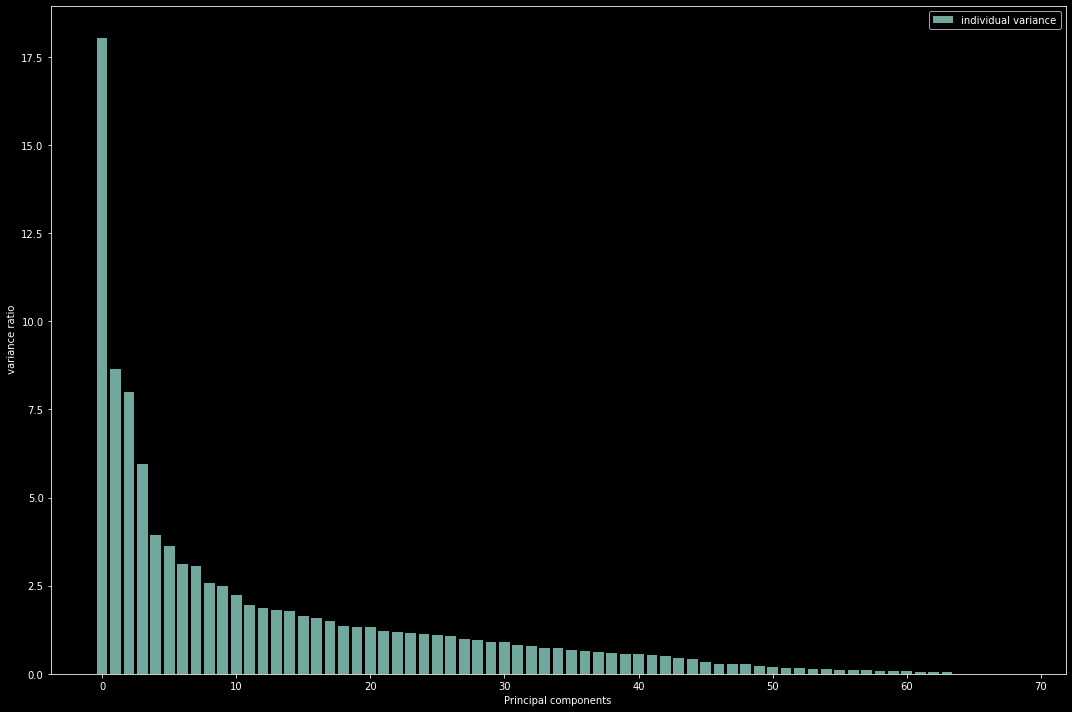

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('dark_background'):
    plt.figure(figsize=(15, 10))

    plt.bar(range(len(eigenvalues)), varariance, alpha=0.8, align='center',
            label='individual variance')
    plt.ylabel(' variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
varariance[0]

18.03511449795365

**Projection in a New Feature Space**

In [ ]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sorting eigenvalues and eigenvectors from higher values to lower values
eigenpairs.sort(key=lambda x: x[0], reverse=True)

eigenpairs[0][0]

12.461068285054322

In [ ]:
eigenpairs[4][1].shape

(69,)

In [ ]:
# only for 5 features 
matrix_weighing = np.hstack((eigenpairs[0][1].reshape(69,1),
                      eigenpairs[1][1].reshape(69,1),
                      eigenpairs[2][1].reshape(69,1),
                      eigenpairs[3][1].reshape(69,1),
                      eigenpairs[4][1].reshape(69,1)))
matrix_weighing

array([[ 6.96083676e-02,  1.22633138e-01, -4.24200430e-03,
         3.03400688e-01,  1.90038444e-01],
       [ 6.81398838e-02,  1.20096844e-01, -1.57355605e-02,
         2.88598937e-01,  1.97863923e-01],
       [-5.54275933e-02,  3.51403783e-02,  3.11133266e-02,
         4.45577975e-02,  1.20864323e-01],
       [ 9.71352566e-02,  1.18762332e-01, -1.44197015e-02,
         2.88900787e-01,  1.75487967e-01],
       [ 1.10112076e-01,  1.11244887e-01, -2.15461931e-02,
         2.79912988e-01,  1.48715064e-01],
       [ 1.08627857e-02, -1.30233535e-01,  2.78147397e-01,
         9.42802445e-03,  1.41840702e-01],
       [-1.15803455e-01,  1.50007412e-02, -5.06746281e-03,
         1.18090476e-01,  9.52983710e-02],
       [-3.77488673e-02, -2.67908747e-02, -2.32157565e-02,
         2.89239110e-02,  2.77420074e-02],
       [-1.69792666e-01, -6.04565112e-03,  6.17856688e-02,
         8.84003609e-02, -2.17579408e-01],
       [-1.58069413e-01, -2.31973950e-03,  4.53821589e-02,
         8.15471342e-02

In [ ]:
y = X.dot(matrix_weighing)
y.shape

(740, 5)

In [ ]:
list(df['new_pdrs'].unique())

['early', 'advanced', 'intermediate', 'healthy']

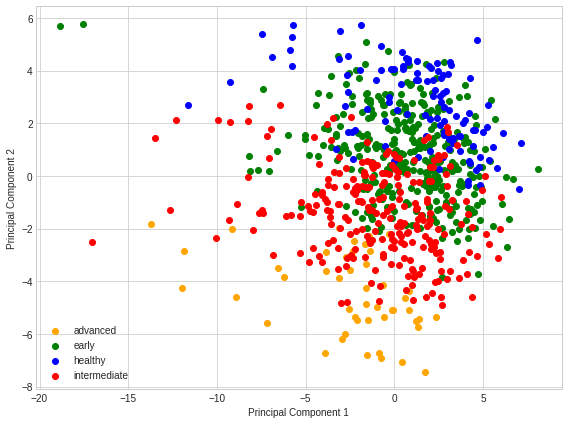

In [ ]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for lab, col in zip(('advanced', 'early', 'healthy', 'intermediate'), ('orange', 'green', 'blue', 'red')):
        plt.scatter(y[Y==lab, 0], y[Y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

**Primary Component Analysis**

Text(0, 0.5, 'Cumulative variance')

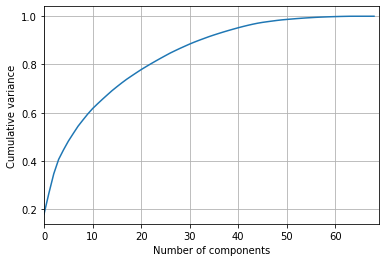

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,69,1)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance')

**Division of training and test data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [ ]:
Y_trains = list(Y_train)
for i in range(len(Y_train)):
    if Y_trains[i]=="advanced":
        Y_trains[i] = 0
    elif Y_trains[i]=="early":
        Y_trains[i] = 1
    elif Y_trains[i]=="healthy":
        Y_trains[i] = 2
    elif Y_trains[i]=="intermediate":
        Y_trains[i] = 3

In [ ]:
Y_tests = list(Y_test)
for i in range(len(Y_test)):
    if Y_tests[i]=="advanced":
        Y_tests[i] = 0
    elif Y_tests[i]=="early":
        Y_tests[i] = 1
    elif Y_tests[i]=="healthy":
        Y_tests[i] = 2
    elif Y_tests[i]=="intermediate":
        Y_tests[i] = 3

**Implementing PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)

X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)       

print("X_train2 shape = ",X_train2.shape)
print("X_test2 shape = ",X_test2.shape)

X_train2 shape =  (592, 5)
X_test2 shape =  (148, 5)


**Classification**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=42)
classifier2.fit(X_train2,Y_train)
y_pred2 = classifier2.predict(X_test2) 

**Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Logisitic Regression:")

print('Accuracy Score:', accuracy_score(Y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(Y_test, y_pred2))
print('Classification \n', classification_report(Y_test, y_pred2))

Logisitic Regression:
Accuracy Score: 0.8716216216216216
Confusion matrix 
 [[ 4  0  0  2]
 [ 0 59  4  2]
 [ 0  4 20  0]
 [ 1  6  0 46]]
Classification 
               precision    recall  f1-score   support

    advanced       0.80      0.67      0.73         6
       early       0.86      0.91      0.88        65
     healthy       0.83      0.83      0.83        24
intermediate       0.92      0.87      0.89        53

    accuracy                           0.87       148
   macro avg       0.85      0.82      0.83       148
weighted avg       0.87      0.87      0.87       148



In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline

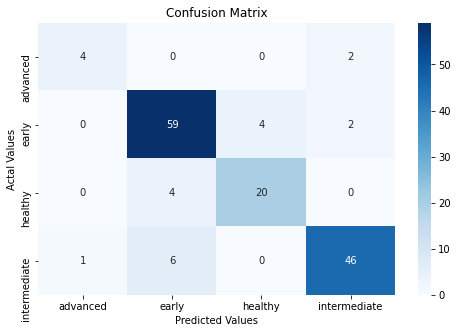

In [ ]:
cm = confusion_matrix(Y_test, y_pred2) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['advanced', 'early', 'healthy', 'intermediate'],  
                           index =['advanced', 'early', 'healthy', 'intermediate']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values') 
plt.show()   

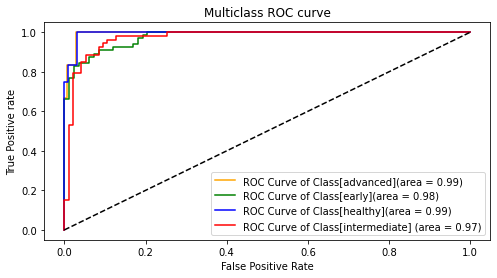

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier 

classifier2 = OneVsRestClassifier(LogisticRegression(random_state=42)) 
classifier2.fit(X_train2,Y_trains)
y_pred2 = classifier2.predict_proba(X_test2) 

        
fpr = {}
tpr = {}
roc_auc = {}
n_class = 4
lw=1.5

for i in range(n_class):    
    
    fpr[i], tpr[i], _ = roc_curve(Y_tests, y_pred2[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 4))
# plotting    
plt.plot(fpr[0], tpr[0], lw=lw,color='orange', label='ROC Curve of Class[advanced](area = {1:0.2f})'
             ''.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], lw=lw,color='green', label='ROC Curve of Class[early](area = {1:0.2f})'
             ''.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], lw=lw,color='blue', label='ROC Curve of Class[healthy](area = {1:0.2f})'
             ''.format(2, roc_auc[2]))
plt.plot(fpr[3], tpr[3], lw=lw,color='red', label='ROC Curve of Class[intermediate] (area = {1:0.2f})'
             ''.format(3, roc_auc[3]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="macro")
auc_score2 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="weighted")
print(auc_score1,auc_score2)

0.9840883560473016 0.9783327583855216


**Support Vector Machines (SVM)**

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train2,Y_train)
y_pred2 = classifier.predict(X_test2)
cm = confusion_matrix(Y_test,y_pred2)
accuracy = accuracy_score(Y_test,y_pred2)
print("Support Vector Machine:")

print('Accuracy Score:', accuracy_score(Y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(Y_test, y_pred2))
print('Classification \n', classification_report(Y_test, y_pred2))

Support Vector Machine:
Accuracy Score: 0.8851351351351351
Confusion matrix 
 [[ 4  0  0  2]
 [ 0 60  2  3]
 [ 0  6 18  0]
 [ 0  4  0 49]]
Classification 
               precision    recall  f1-score   support

    advanced       1.00      0.67      0.80         6
       early       0.86      0.92      0.89        65
     healthy       0.90      0.75      0.82        24
intermediate       0.91      0.92      0.92        53

    accuracy                           0.89       148
   macro avg       0.92      0.82      0.86       148
weighted avg       0.89      0.89      0.88       148



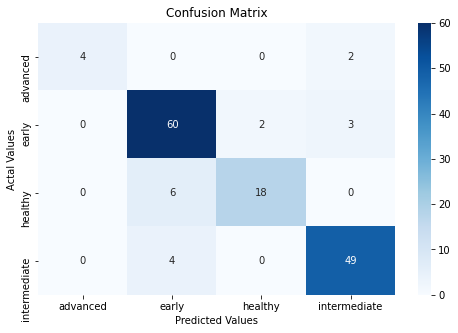

In [ ]:
cm = confusion_matrix(Y_test, y_pred2) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['advanced', 'early', 'healthy', 'intermediate'],  
                           index =['advanced', 'early', 'healthy', 'intermediate']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values') 
plt.show()   

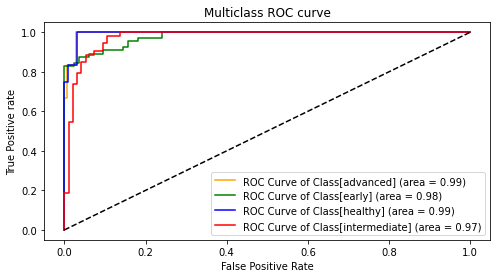

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier 

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_pred2 = classifier.fit(X_train2, Y_trains).predict_proba(X_test2)

fpr = {}
tpr = {}
roc_auc = {}
n_class = 4
lw=1.5

for i in range(n_class):    
    
    fpr[i], tpr[i], _ = roc_curve(Y_tests, y_pred2[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 4))   
# plotting    
plt.plot(fpr[0], tpr[0], lw=lw,color='orange', label='ROC Curve of Class[advanced] (area = {1:0.2f})'
             ''.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], lw=lw,color='green', label='ROC Curve of Class[early] (area = {1:0.2f})'
             ''.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], lw=lw,color='blue', label='ROC Curve of Class[healthy] (area = {1:0.2f})'
             ''.format(2, roc_auc[2]))
plt.plot(fpr[3], tpr[3], lw=lw,color='red', label='ROC Curve of Class[intermediate] (area = {1:0.2f})'
             ''.format(3, roc_auc[3])) 

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="macro")
auc_score2 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="weighted")
print(auc_score1,auc_score2)

0.9853825865174213 0.9803970611156456


**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train2,Y_train)
y_pred2 = classifier.predict(X_test2)

print("GNB:")
print('Accuracy Score:', accuracy_score(Y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(Y_test, y_pred2))
print('Classification \n', classification_report(Y_test, y_pred2))

GNB:
Accuracy Score: 0.8040540540540541
Confusion matrix 
 [[ 4  0  0  2]
 [ 0 62  0  3]
 [ 0 10 14  0]
 [ 0 14  0 39]]
Classification 
               precision    recall  f1-score   support

    advanced       1.00      0.67      0.80         6
       early       0.72      0.95      0.82        65
     healthy       1.00      0.58      0.74        24
intermediate       0.89      0.74      0.80        53

    accuracy                           0.80       148
   macro avg       0.90      0.73      0.79       148
weighted avg       0.84      0.80      0.80       148



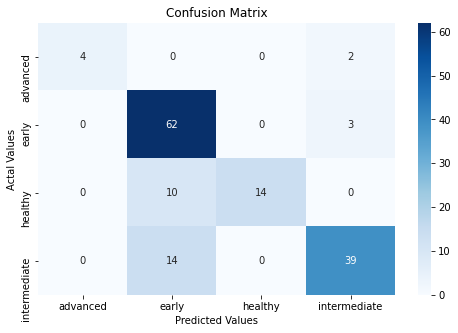

In [ ]:
cm = confusion_matrix(Y_test, y_pred2) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['advanced', 'early', 'healthy', 'intermediate'],  
                           index =['advanced', 'early', 'healthy', 'intermediate']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values') 
plt.show()   

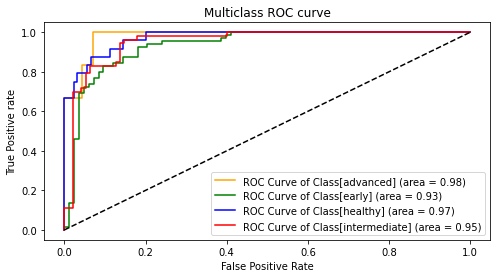

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
from sklearn.multiclass import OneVsRestClassifier 

classifier = OneVsRestClassifier(GaussianNB())
y_pred2 = classifier.fit(X_train2, Y_trains).predict_proba(X_test2)


fpr = {}
tpr = {}
roc_auc = {}
n_class = 4
lw=1.5

for i in range(n_class):    
    
    fpr[i], tpr[i], _ = roc_curve(Y_tests, y_pred2[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
 
plt.figure(figsize=(8, 4))
# plotting    
plt.plot(fpr[0], tpr[0], lw=lw,color='orange', label='ROC Curve of Class[advanced] (area = {1:0.2f})'
             ''.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], lw=lw,color='green', label='ROC Curve of Class[early] (area = {1:0.2f})'
             ''.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], lw=lw,color='blue', label='ROC Curve of Class[healthy] (area = {1:0.2f})'
             ''.format(2, roc_auc[2]))
plt.plot(fpr[3], tpr[3], lw=lw,color='red', label='ROC Curve of Class[intermediate] (area = {1:0.2f})'
             ''.format(3, roc_auc[3]))    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="macro")
auc_score2 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="weighted")
print(auc_score1,auc_score2)

0.9593877207320614 0.9477028527500269


**KNN(k-nearest neighbors algorithm)**

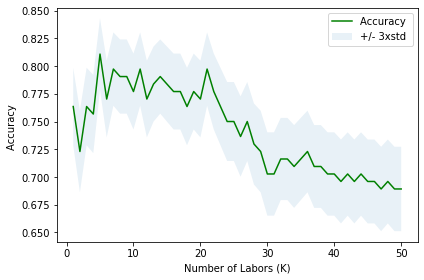

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train2,Y_trains)
    y_pred=knnmodel.predict(X_test2)
    mean_acc[n-1]=metrics.accuracy_score(Y_tests,y_pred)
    std_acc[n-1]=np.std(y_pred==Y_tests)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Labors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The accuracy is", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The accuracy is 0.8108108108108109 with k= 5


In [ ]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, Y_train)
y_pred2 = knn.predict(X_test2)
print("K-Neighbors Classifier:")

print('Accuracy Score:', accuracy_score(Y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(Y_test, y_pred2))
print('Classification \n', classification_report(Y_test, y_pred2))

K-Neighbors Classifier:
Accuracy Score: 0.8108108108108109
Confusion matrix 
 [[ 5  0  0  1]
 [ 0 56  8  1]
 [ 0 10 14  0]
 [ 1  7  0 45]]
Classification 
               precision    recall  f1-score   support

    advanced       0.83      0.83      0.83         6
       early       0.77      0.86      0.81        65
     healthy       0.64      0.58      0.61        24
intermediate       0.96      0.85      0.90        53

    accuracy                           0.81       148
   macro avg       0.80      0.78      0.79       148
weighted avg       0.82      0.81      0.81       148



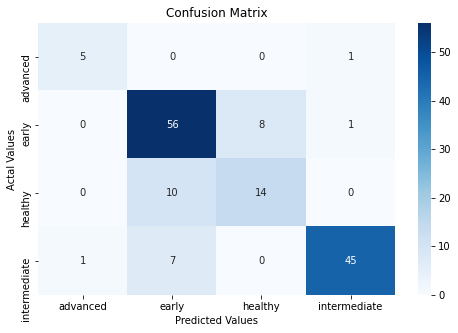

In [ ]:
cm = confusion_matrix(Y_test, y_pred2) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['advanced', 'early', 'healthy', 'intermediate'],  
                           index =['advanced', 'early', 'healthy', 'intermediate']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values') 
plt.show()   

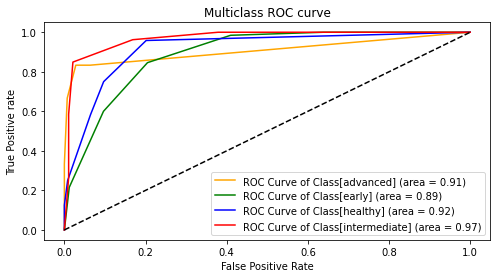

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve, auc
from sklearn import neighbors, datasets, preprocessing
from sklearn.multiclass import OneVsRestClassifier 

classifier = OneVsRestClassifier(neighbors.KNeighborsClassifier(n_neighbors=5))
y_pred2 = classifier.fit(X_train2, Y_trains).predict_proba(X_test2)


fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 4
lw=1.5

for i in range(n_class):    
    
    fpr[i], tpr[i], _ = roc_curve(Y_tests, y_pred2[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 4))    
# plotting    
plt.plot(fpr[0], tpr[0], lw=lw,color='orange', label='ROC Curve of Class[advanced] (area = {1:0.2f})'
             ''.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], lw=lw,color='green', label='ROC Curve of Class[early] (area = {1:0.2f})'
             ''.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], lw=lw,color='blue', label='ROC Curve of Class[healthy] (area = {1:0.2f})'
             ''.format(2, roc_auc[2]))
plt.plot(fpr[3], tpr[3], lw=lw,color='red', label='ROC Curve of Class[intermediate] (area = {1:0.2f})'
             ''.format(3, roc_auc[3]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="macro")
auc_score2 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="weighted")
print(auc_score1,auc_score2)

0.921326439174628 0.9239449991703015


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
classifier = RF(n_estimators=10, criterion='entropy', random_state=42)
classifier.fit(X_train2,Y_train)
y_pred2 = classifier.predict(X_test2)
print("Random Forest Classifier:")

print('Accuracy Score:', accuracy_score(Y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(Y_test, y_pred2))
print('Classification \n', classification_report(Y_test, y_pred2))

Random Forest Classifier:
Accuracy Score: 0.8243243243243243
Confusion matrix 
 [[ 4  0  0  2]
 [ 0 60  4  1]
 [ 0  8 16  0]
 [ 1 10  0 42]]
Classification 
               precision    recall  f1-score   support

    advanced       0.80      0.67      0.73         6
       early       0.77      0.92      0.84        65
     healthy       0.80      0.67      0.73        24
intermediate       0.93      0.79      0.86        53

    accuracy                           0.82       148
   macro avg       0.83      0.76      0.79       148
weighted avg       0.83      0.82      0.82       148



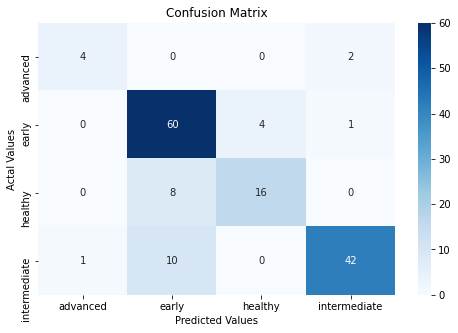

In [ ]:
cm = confusion_matrix(Y_test, y_pred2) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['advanced', 'early', 'healthy', 'intermediate'],  
                           index =['advanced', 'early', 'healthy', 'intermediate']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values') 
plt.show()   

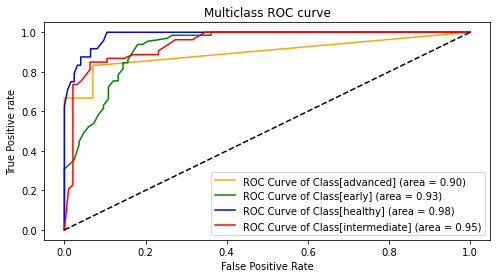

In [ ]:
# roc curve for classes
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.multiclass import OneVsRestClassifier 

classifier = OneVsRestClassifier(RF(n_estimators=10, criterion='entropy', random_state=42))
y_pred2 = classifier.fit(X_train2, Y_trains).predict_proba(X_test2)

fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 4
lw=1.5

for i in range(n_class):    
    
    fpr[i], tpr[i], _ = roc_curve(Y_tests, y_pred2[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 4))    
# plotting    
plt.plot(fpr[0], tpr[0], lw=lw,color='orange', label='ROC Curve of Class[advanced] (area = {1:0.2f})'
             ''.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], lw=lw,color='green', label='ROC Curve of Class[early] (area = {1:0.2f})'
             ''.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], lw=lw,color='blue', label='ROC Curve of Class[healthy] (area = {1:0.2f})'
             ''.format(2, roc_auc[2]))
plt.plot(fpr[3], tpr[3], lw=lw,color='red', label='ROC Curve of Class[intermediate] (area = {1:0.2f})'
             ''.format(3, roc_auc[3]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="macro")
auc_score2 = roc_auc_score(Y_tests, y_pred2, multi_class='ovr',average="weighted")
print(auc_score1,auc_score2)

0.9386729823677926 0.9416101929814155
